# Sequence 7 : matplotlib

In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = np.array([3., 5.6,3.3, 4.5,])

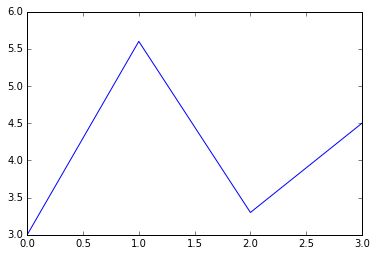

In [4]:
plt.plot(a)

# Il faut avoir une approche objet!!

De mieux choisir explicitement, si on tarce 2 courbes sur 2 figures ou sur une seule.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


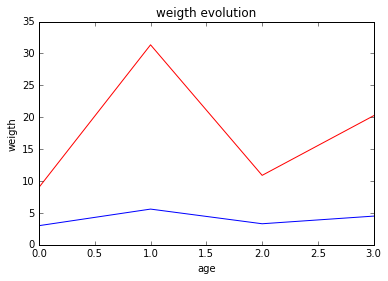

In [5]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))
ax.plot(a)
ax.plot(a**2, color='r')
ax.set_title('weigth evolution')
ax.set_xlabel('age')
ax.set_ylabel('weigth')

Celà permet aussi de générer une grille de subplot.

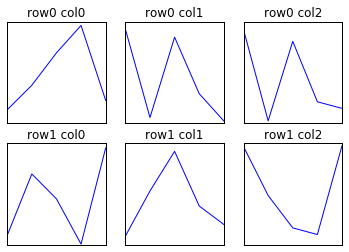

In [6]:
#TODO on fait une grille
fig, axs = plt.subplots(nrows = 2, ncols=3)
for r in range(2):
    for c in range(3):
        ax = axs[r,c]
        ax.plot(np.random.rand(5))
        ax.set_title('row{} col{}'.format(r,c))
        ax.set_xticks([])
        ax.set_yticks([])
fig.savefig('mafigure.png')


# 2 variables

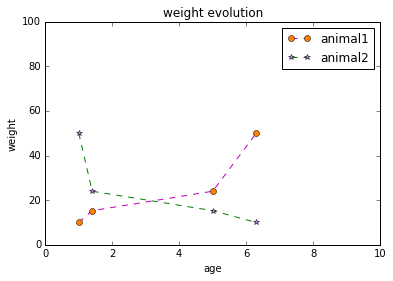

In [7]:
fig, ax = plt.subplots()
a = np.array([1, 1.4, 5, 6.3])
w = np.array([10, 15.3, 24, 50.])
w2 = w[::-1]
ax.plot(a, w, marker='o', linestyle='--', color='m', markerfacecolor='#FF8000', label='animal1')
ax.plot(a, w2, marker='*', linestyle='--', color='g', markerfacecolor='#C280FF', label='animal2')
ax.set_title('weight evolution')
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_xlim(0,10)
ax.set_ylim(0,100)
ax.legend()

 # scatter plot
 pour un nuage de point c'est identique mais sauf le line style

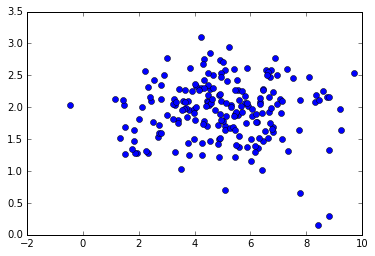

In [8]:
fig, ax = plt.subplots()
x = np.random.randn(200)*2+5
y = np.random.randn(200)/2+2
ax.plot(x, y, marker='o', linestyle='None', )


# Excercice 7.1


Créer un signal sinusoidal de frequence 5Hz entre 0 et 3.s.

Aide : il faut créer un vecteur **temps**

frequence echantillonage de 1000Hz


# Solution 7.1

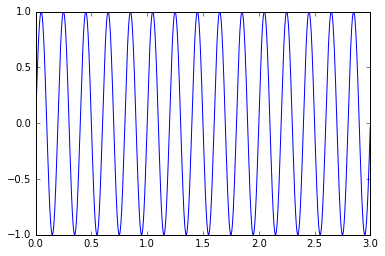

In [9]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)
sig = np.sin(np.pi*2*freq*times)
fig, ax = plt.subplots()
ax.plot(times, sig)

# exercice 7.2

Idem mais avec du bruit blanc.



# Solution 7.2

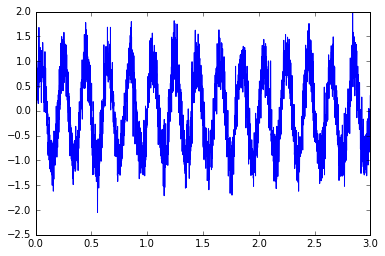

In [10]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)
sig = np.sin(np.pi*2*freq*times)
noise = np.random.randn(sig.size)*.3
sig = sig + noise
fig, ax = plt.subplots()
ax.plot(times, sig)

# histogram
numpy propose une fonction histogram qui renvois count, bins.
Attention le vecteur bins correspond au limites de bins donc count.size = bins.size - 1


<Container object of 50 artists>

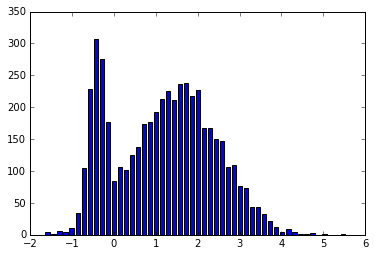

In [11]:
#TODO detail du count
a = np.concatenate([np.random.randn(1000)*.2-.4, np.random.randn(4000)+1.6])
bins = np.arange(-1, 1, .1)
count, bins = np.histogram(a, bins=bins)
fig, ax = plt.subplots()
ax.bar(bins[:-1],count,width=.1)

(array([   4.,    2.,    6.,    5.,   10.,   34.,  104.,  229.,  307.,
         275.,  177.,   85.,  106.,  102.,  125.,  138.,  174.,  177.,
         193.,  213.,  226.,  211.,  237.,  238.,  218.,  227.,  168.,
         167.,  150.,  147.,  107.,  109.,   76.,   74.,   43.,   44.,
          32.,   21.,   12.,    4.,    9.,    5.,    1.,    2.,    3.,
           0.,    1.,    0.,    0.,    2.]),
 array([-1.63960312, -1.49568859, -1.35177406, -1.20785953, -1.063945  ,
        -0.92003047, -0.77611594, -0.63220141, -0.48828688, -0.34437235,
        -0.20045782, -0.05654329,  0.08737124,  0.23128576,  0.37520029,
         0.51911482,  0.66302935,  0.80694388,  0.95085841,  1.09477294,
         1.23868747,  1.382602  ,  1.52651653,  1.67043106,  1.81434559,
         1.95826012,  2.10217464,  2.24608917,  2.3900037 ,  2.53391823,
         2.67783276,  2.82174729,  2.96566182,  3.10957635,  3.25349088,
         3.39740541,  3.54131994,  3.68523447,  3.829149  ,  3.97306352,
         4.11697

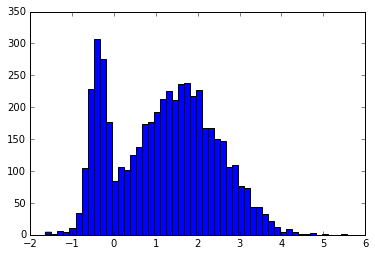

In [12]:
#plus simplement
fig, ax = plt.subplots()
ax.hist(a, bins=50)

# image

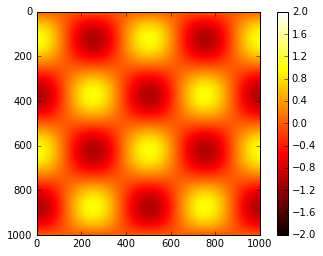

In [13]:
# generationdes data ne pas comprendre ceci
x = np.cos(np.linspace(0, 4*np.pi, 1000))
y = np.sin(np.linspace(0, 4*np.pi, 1000))
X,Y = np.meshgrid(x,y)
data = Y*X

# attention interpolation
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot', interpolation='nearest')
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

# fill_between

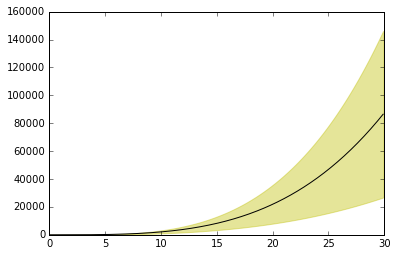

In [14]:
fig, ax = plt.subplots()
x = np.arange(0,30, .1)
y1 = x**3
y2 = x**3.5
m = (y1 + y2)/2

ax.fill_between(x, y1, y2, color='y', alpha=.4)
ax.plot(x, m, color='k')


# excerice 7.3

Générer 9 signaux sinusoidaux de frequence 5Hz entre 0 et 3.s.
Chaque signal a niveau de bruit de plus en plus grand.

Sur la figure 1 : Afficher chaque signal dans un subplot sur une grille
Sur la figure 2 : afficher la moyenne et la std.

# Solution 7.3

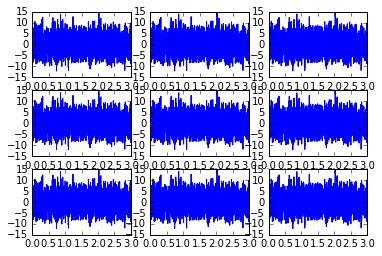

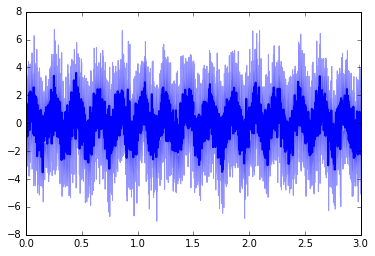

In [15]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)

#generate data
sigs = []
for i in range(9):
    sig = np.sin(np.pi*2*freq*times)
    noise = np.random.randn(sig.size)*i*.5
    sig = sig + noise
    sigs.append(sig)

# plots
    
fig1, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.reshape(-1)
for i in range(9):
    ax = axs[i]
    ax.plot(times, sig)

fig2, ax = plt.subplots()
sigs = np.vstack(sigs)
m = np.mean(sigs, axis=0)
s = np.std(sigs, axis=0)
ax.plot(times, m, linewidth=2)
ax.fill_between(times, m-s, m+s, color='b', alpha=.4)
